In [31]:
import yfinance as yf
import pandas as pd 
import seaborn as sns
from scipy.stats import zscore

In [32]:
ticker="ITC.NS"
data=yf.download(ticker, start="2023-01-01", end="2023-12-12")
print(data.head(10))


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-02  330.899994  334.000000  329.649994  332.850006  312.541901   
2023-01-03  331.500000  333.350006  330.250000  331.100006  310.898712   
2023-01-04  331.850006  332.500000  326.000000  327.000000  307.048859   
2023-01-05  328.649994  333.899994  328.200012  333.450012  313.105347   
2023-01-06  334.700012  337.549988  333.100006  335.049988  314.607697   
2023-01-09  336.950012  341.299988  336.149994  338.049988  317.424683   
2023-01-10  337.899994  338.399994  332.549988  333.399994  313.058350   
2023-01-11  335.100006  335.100006  331.299988  331.799988  311.555969   
2023-01-12  333.399994  333.600006  328.100006  329.850006  309.724945   
2023-01-13  329.850006  332.250000  326.399994  328.750000  308.692078   

              Volume  
Date                  
2023-01-02   5951893  
2023-01-03   5997051  
2023-01-04   668976

In [33]:
data["Daily_returns"]=data["Adj Close"].pct_change()
data.iloc[0,6]=0
# Calculating Z-Score
data["z_score_close"]=zscore(data["Close"])
data["z_score_volume"]=zscore(data["Volume"])
data["z_score_returns"]=zscore(data["Daily_returns"])
print(data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-02  330.899994  334.000000  329.649994  332.850006  312.541901   
2023-01-03  331.500000  333.350006  330.250000  331.100006  310.898712   
2023-01-04  331.850006  332.500000  326.000000  327.000000  307.048859   
2023-01-05  328.649994  333.899994  328.200012  333.450012  313.105347   
2023-01-06  334.700012  337.549988  333.100006  335.049988  314.607697   

             Volume  Daily_returns  z_score_close  z_score_volume  \
Date                                                                
2023-01-02  5951893       0.000000      -2.245978       -0.719159   
2023-01-03  5997051      -0.005257      -2.290436       -0.713036   
2023-01-04  6689769      -0.012383      -2.394593       -0.619114   
2023-01-05  8171437       0.019725      -2.230735       -0.418221   
2023-01-06  8284135       0.004798      -2.190089       -0.402941  

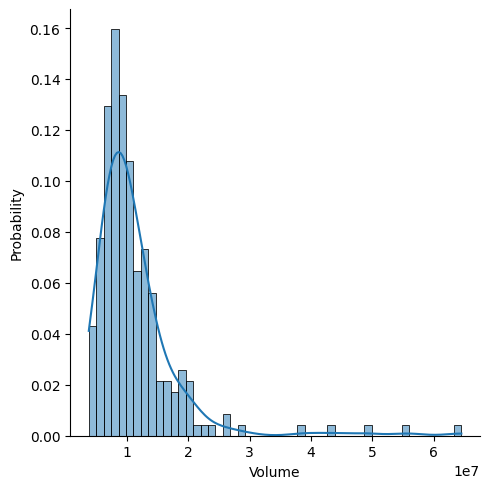

In [34]:
# Plotting probability distributions 
plot1=sns.displot(data["Volume"], fill=True, kde=True, stat="probability" , bins=50)

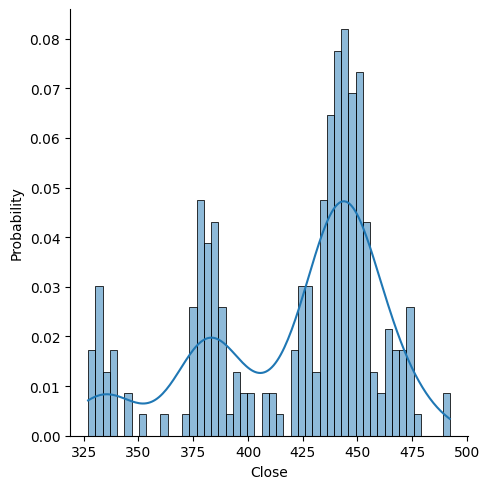

In [35]:
plot2=sns.displot(data["Close"], fill=True, kde=True, stat="probability" , bins=50)

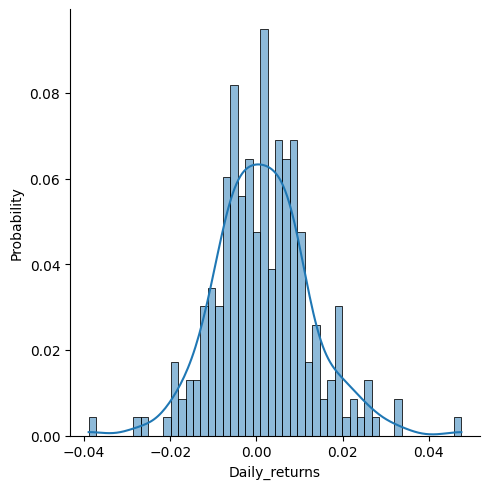

In [36]:
plot3=sns.displot(data["Daily_returns"], fill=True, kde=True, stat="probability" , bins=50 )